In [1]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import pandas as pd

# Filepaths
# Metadat for area data URl:https://hri.fi/data/dataset/paakaupunkiseudun-postinumeroalueet/resource/ec3d837b-04c2-41db-86bd-2aa5c13a7f3e
grid_fp = r'data/MetropAccess_YKR_grid_EurefFIN.shp'
roads_fp =r'data/roads.shp'
area_fp =r'data/PKS_Postinumeroalueet_manner_2019.shp' 
data_fp = r'data/TravelTimes_to_5878070_Jumbo.txt'

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
area = gpd.read_file(area_fp)
data_Jumbo = pd.read_csv(data_fp,delimiter=';',na_values=-1)
grid.head()

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [2]:
# Dropping Na-values and merging grid to data to make a GeoDataFrame
data_Jumbo = data_Jumbo.dropna()
data_geo = grid.merge(data_Jumbo, left_on='YKR_ID',right_on='from_id')

In [3]:
# Changing crs to web-Mercator 
roads = roads.to_crs(epsg=3857)
data_geo = data_geo.to_crs(epsg=3857)
area = area.to_crs(epsg=3857)

In [4]:
# Calculating the difference between rush hour and midday travel times
def diff(row):
    diff = row['car_r_t']-row['car_m_t']
    return diff
data_geo['DIFF'] = data_geo.apply(diff,axis=1)

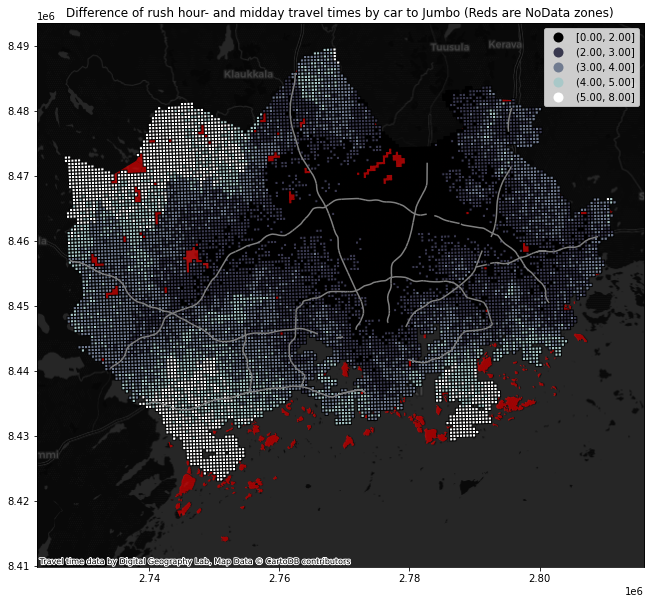

In [5]:
# Viualisation (area,roads are only for the visualisation)

import contextily as ctx
fig,ax = plt.subplots(figsize=(15,10))

area.plot(ax=ax,
         legend=True,
          color='Red',
          alpha=0.6
         )
data_geo.plot(ax=ax,
              column='DIFF',
             legend=True,
              alpha = 1,
              scheme='quantiles',
              k=5,
              cmap='bone',
              edgecolor='k',
             )
roads.plot(ax=ax,
           color='Grey'
          )

# Setting title, credits and adding basemap to figure
ax.set_title('Difference of rush hour- and midday travel times by car to Jumbo (Reds are NoData zones)')
credits = "Travel time data by Digital Geography Lab, Map Data © CartoDB contributors"
ctx.add_basemap(ax,
               source=ctx.providers.CartoDB.DarkMatter,
               attribution=credits,
               zoom=10)
#Saving to disk
plt.savefig('docs/Jumbo_travel_time_difference.png',dpi=300)